In [1]:
import pandas as pd
dataset = pd.read_csv(r'C:\Users\AkanshaS\Desktop\Akansha\NewGit\marketprophecy\BTC USD\BTC-USD.csv',na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

In [2]:
print("Dataframe Shape: ", dataset. shape)
print(dataset.head())

Dataframe Shape:  (2193, 6)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  430.721008  436.246002  427.515015  434.334015  434.334015   
2016-01-02  434.622009  436.062012  431.869995  433.437988  433.437988   
2016-01-03  433.578003  433.743011  424.705994  430.010986  430.010986   
2016-01-04  430.061005  434.516998  429.084015  433.091003  433.091003   
2016-01-05  433.069000  434.182007  429.675995  431.959991  431.959991   

              Volume  
Date                  
2016-01-01  36278900  
2016-01-02  30096600  
2016-01-03  39633800  
2016-01-04  38477500  
2016-01-05  34522600  


<AxesSubplot:xlabel='Date'>

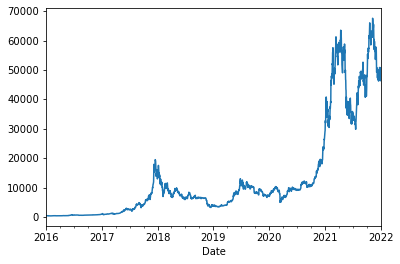

In [3]:
import matplotlib 
%matplotlib inline

dataset['Adj Close'].plot()

In [4]:
# y - dependent variable, x - independent variable
y = pd.DataFrame(dataset['Adj Close'])
x = ['Open', 'High', 'Low', 'Volume']

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_down = scaler.fit_transform(dataset[x])
scale_down = pd.DataFrame(columns = x, data = scale_down, index = dataset.index)

scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y = pd.DataFrame(data = y)#, index = dataset.index)


scale_down, y

(                Open      High       Low    Volume
 Date                                              
 2016-01-01  0.000977  0.000896  0.001100  0.000022
 2016-01-02  0.001035  0.000893  0.001166  0.000005
 2016-01-03  0.001020  0.000859  0.001057  0.000032
 2016-01-04  0.000967  0.000871  0.001123  0.000028
 2016-01-05  0.001012  0.000866  0.001132  0.000017
 ...              ...       ...       ...       ...
 2021-12-28  0.748903  0.735294  0.712726  0.095178
 2021-12-29  0.703416  0.697874  0.694360  0.085544
 2021-12-30  0.686549  0.694369  0.692221  0.075962
 2021-12-31  0.696652  0.703030  0.688581  0.105276
 2022-01-01  0.683886  0.693599  0.695677  0.069967
 
 [2193 rows x 4 columns],
              0
 0     0.001042
 1     0.001028
 2     0.000977
 3     0.001023
 4     0.001006
 ...        ...
 2188  0.702720
 2189  0.685694
 2190  0.696608
 2191  0.683637
 2192  0.704177
 
 [2193 rows x 1 columns])

In [6]:
from sklearn.model_selection import TimeSeriesSplit
ts = TimeSeriesSplit(n_splits = 10)
for train_ind, test_ind in ts.split(scale_down):
    xtr, xte = scale_down[:len(train_ind)], scale_down[len(train_ind):(len(train_ind)+len(test_ind))]
    ytr, yte = y[:len(train_ind)].values.ravel(), y[len(train_ind):(len(train_ind)+len(test_ind))].values.ravel()

In [7]:
import numpy as np
trainx = np.array(xtr)
testx = np.array(xte)
xtr = trainx.reshape(xtr.shape[0], 1, xtr.shape[1])
xte = testx.reshape(xte.shape[0], 1, xte.shape[1])

In [8]:
from keras.layers import LSTM, Dense, Dropout
from keras.utils.vis_utils import plot_model
from keras.models import Sequential

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainx.shape[1]), activation='relu',return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
xtr

array([[[9.77127943e-04, 8.95947982e-04, 1.09956307e-03, 2.21260405e-05]],

       [[1.03519181e-03, 8.93258647e-04, 1.16552048e-03, 4.50961014e-06]],

       [[1.01965246e-03, 8.59362396e-04, 1.05701964e-03, 3.16858099e-05]],

       ...,

       [[5.75308336e-01, 5.93489822e-01, 5.81614866e-01, 1.22871348e-01]],

       [[5.96298235e-01, 5.98121960e-01, 5.94521430e-01, 1.32192713e-01]],

       [[5.92450979e-01, 5.86742937e-01, 5.72811669e-01, 1.11652092e-01]]])

In [9]:
log=lstm.fit(xtr, ytr, epochs=50, batch_size=8, verbose=1, shuffle=False)

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 0.0032
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 7.0336e-04
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 3.4029e-04
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 2.5641e-04
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 2.3526e-04
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 2.0216e-04
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1.8414e-04
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1.8739e-04
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 2.2383e-04
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 2.5622e-04
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - lo

In [10]:
y_prediction= lstm.predict(xte)
xte

array([[[0.56525326, 0.5720808 , 0.5616593 , 0.10562551]],

       [[0.56165206, 0.552693  , 0.52858471, 0.10307298]],

       [[0.52823745, 0.52741385, 0.52369592, 0.08884372]],

       [[0.52390035, 0.52159181, 0.50096303, 0.10439272]],

       [[0.52506139, 0.51665364, 0.4686106 , 0.15039782]],

       [[0.46524465, 0.48114682, 0.43222686, 0.16793735]],

       [[0.4785414 , 0.50250126, 0.47583031, 0.1318991 ]],

       [[0.49591271, 0.50945066, 0.48510804, 0.09430361]],

       [[0.51044437, 0.51322755, 0.46944282, 0.11455649]],

       [[0.46483216, 0.47157482, 0.45177762, 0.1098676 ]],

       [[0.47514492, 0.50107932, 0.48036065, 0.10110898]],

       [[0.51074229, 0.50931968, 0.50808131, 0.09649531]],

       [[0.5077124 , 0.52864622, 0.51338837, 0.10791875]],

       [[0.52903911, 0.52181506, 0.51086923, 0.09696979]],

       [[0.51605397, 0.50663157, 0.49265897, 0.10774065]],

       [[0.49393013, 0.49060585, 0.49094602, 0.11027675]],

       [[0.49846718, 0.5047793 , 0.50051

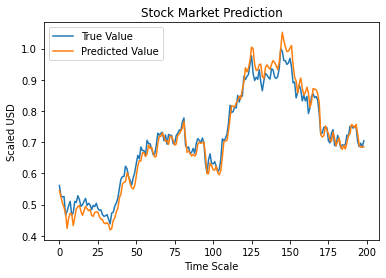

In [11]:
import matplotlib. pyplot as plt
plt.plot(yte, label = 'True Value')
plt.plot(y_prediction, label = 'Predicted Value')
plt.title("Stock Market Prediction")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [12]:
oot = pd.read_csv(r'C:\Users\AkanshaS\Desktop\Akansha\NewGit\marketprophecy\BTC USD\BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv', na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
x = ['Open', 'High', 'Low', 'Volume']
y = pd.DataFrame(oot['Adj Close'])

scaler = MinMaxScaler()
scale_down = scaler.fit_transform(oot[x])
scale_down = pd.DataFrame(columns = x, data = scale_down, index = oot.index)

scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y = pd.DataFrame(data = y)#, index = market.index)

scale_down = np.array(scale_down)
scale_down = scale_down.reshape(scale_down.shape[0],1,scale_down.shape[1])
print(scale_down, y)

#scale_down = np.array(scale_down).reshape(-1)
y = np.array(y).reshape(-1)
#sd = trainx.reshape(xtr.shape[0], 1, xtr.shape[1])
#xte = testx.reshape(xte.shape[0], 1, xte.shape[1])

out_of_time_prediction = lstm.predict(scale_down)

[[[0.89162366 0.99527487 0.95842477 0.1428998 ]]

 [[1.         1.         1.         0.19133624]]

 [[0.97329473 0.96762084 0.92532863 0.26494996]]

 [[0.90326768 0.95852066 0.91922165 0.40042997]]

 [[0.85898151 0.91681066 0.7031558  0.31928914]]

 [[0.67424764 0.63900649 0.6919889  0.2237788 ]]

 [[0.64164074 0.58701981 0.57730247 1.        ]]

 [[0.51561889 0.50625275 0.5476695  0.19298659]]

 [[0.52933328 0.54425102 0.5963705  0.09562248]]

 [[0.54322516 0.50367965 0.48362249 0.25104121]]

 [[0.53604408 0.57370632 0.60146041 0.1679883 ]]

 [[0.60907744 0.67278054 0.68346467 0.27110799]]

 [[0.70442364 0.68527648 0.6774714  0.4751421 ]]

 [[0.59773396 0.60388875 0.64350446 0.12844661]]

 [[0.6375507  0.63690598 0.69370735 0.05359649]]

 [[0.64310262 0.6117609  0.69531552 0.04684984]]

 [[0.63883479 0.58927523 0.62139523 0.10132345]]

 [[0.57012522 0.532935   0.60032392 0.11176591]]

 [[0.57993756 0.52803483 0.58940444 0.12146115]]

 [[0.53006948 0.60968324 0.5477095  0.08250515]]



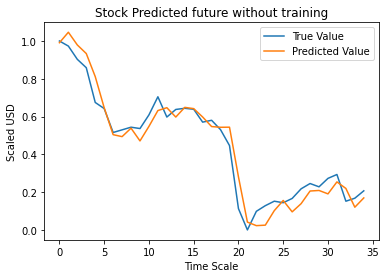

In [13]:
import matplotlib. pyplot as plt
plt.plot(y, label = 'True Value')
plt.plot(out_of_time_prediction, label = 'Predicted Value')
plt.title("Stock Predicted future without training")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor as rfr
y = np.array(y).reshape(-1)
out_of_time_prediction = np.array(out_of_time_prediction).reshape(-1)
print(out_of_time_prediction)
print(y,'\n','\n')

print('Accuracy of this code is ',r2_score(out_of_time_prediction, y))

[0.99079347 1.0462781  0.97899216 0.93352103 0.8117188  0.646669
 0.50409204 0.49377307 0.53849804 0.47105828 0.54794466 0.6318118
 0.6469478  0.5974187  0.64859897 0.64200246 0.5976524  0.54708415
 0.5432388  0.54375124 0.28090298 0.04137038 0.02261085 0.02518942
 0.10186231 0.15590648 0.09563167 0.13898385 0.20586778 0.20886827
 0.19076465 0.25417662 0.21947697 0.12022085 0.16927446]
[1.         0.97301054 0.9029203  0.85863158 0.67465032 0.64240821
 0.51575239 0.5296613  0.5436983  0.53656052 0.60882293 0.70468198
 0.5974229  0.63757037 0.64370941 0.63869071 0.57047882 0.5803616
 0.53048196 0.446422   0.11275308 0.         0.09849078 0.12831905
 0.15199656 0.14394675 0.16655268 0.21760111 0.24555875 0.22813079
 0.27281302 0.29336745 0.151916   0.16784586 0.20693501] 
 

Accuracy of this code is  0.9521548834258919
